In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random



%matplotlib inline

# Based on the main parameters for drinking water quality.
### Keeping them as the maximum limit, a random dataset was generated along with records violating such limits to account for non potable water

In [2]:


max_limits = {
    'Colour (TCU)': 15,
    'Turbidity (NTU)': 5,
    'pH': (6.5, 8.5),
    'Conductivity (uS/cm)': 1500,
    'Total Dissolved Solids (mg/l)': 1000,
    'Total Hardness (mg/l as CaCO3)': 300,
    'Aluminium (mg/l)': 0.2,
    'Chloride (mg/l)': 250,
    'Total Iron (mg/l)': 0.3,
    'Sodium (mg/l)': 200,
    'Sulphate (mg/l)': 400,
    'Zinc (mg/l)': 5,
    'Magnesium (mg/l)': 100,
    'Calcium (mg/l)': 150,
    'Potassium (mg/l)': 50,
    'Nitrate (mg/l)' : 45,
    'Phosphate (mg/l)' :2.2
}


#  To check if a value is within the maximum limit for a feature
def check_limit(value, feature):
      if feature == 'pH':
        return max_limits[feature][0] <= value <= max_limits[feature][1]
      else:
        return value <= max_limits[feature]
    

# Generate a record with values within the max limits for all features
def potable_dataset():
    data = {}
    for feature, max_limit in max_limits.items():
        if feature == 'pH':
            data[feature] = round(np.random.uniform(max_limit[0], max_limit[1]),2)
        else:
            data[feature] = round(np.random.uniform(0, max_limit),2)
        data['Potability'] = 'potable'
    return data

# Generate a record with values outside the max limits for all features
def non_potable_dataset():
        data = {}
        for feature, max_limit in max_limits.items():
            if feature == 'pH':
                
                data[feature] = round(random.choice([np.random.uniform(0, max_limit[0]), np.random.uniform(max_limit[1], 14)]),2)
            else:
                data[feature] = round(np.random.uniform(max_limit, max_limit * 2),2)
            data['Potability'] = 'non-potable'
        return data

# Generate a dataset with equal number of potable and non-potable records
def combined_dataset(num_records):
    dataset = []
    
    for i in range(num_records // 2):
        dataset.append(potable_dataset())
        
    for i in range(num_records // 2):
        dataset.append(non_potable_dataset())
        
    df = pd.DataFrame(dataset)
    
    potability_col = df.pop('Potability')
    df['Potability'] = potability_col
  
    return df




In [4]:
df1 = combined_dataset(10000)

In [19]:
df1

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Nitrate (mg/l),Phosphate (mg/l),Potability
0,9.50,4.69,7.93,1033.18,562.13,260.17,0.04,122.15,0.03,145.91,391.28,1.37,10.79,101.57,9.42,33.58,0.37,potable
1,8.07,3.07,6.55,73.00,959.88,83.40,0.17,39.18,0.21,164.35,90.98,0.57,16.36,112.71,39.31,21.60,0.93,potable
2,14.06,1.02,6.99,443.64,731.86,258.42,0.07,84.44,0.10,142.44,45.71,0.76,29.99,72.19,38.66,33.56,0.59,potable
3,4.12,3.09,7.93,1234.94,534.14,10.87,0.14,164.80,0.03,198.84,331.97,1.89,1.76,36.69,22.30,42.48,1.01,potable
4,5.67,4.71,8.07,647.75,9.03,222.81,0.16,135.90,0.03,134.32,180.95,3.27,17.44,97.29,9.25,3.51,0.91,potable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,23.87,9.97,13.98,1823.06,1813.32,348.54,0.26,437.32,0.49,304.36,651.73,8.32,171.24,244.34,52.95,75.06,3.30,non-potable
9996,23.17,9.72,3.95,2589.48,1247.69,549.06,0.38,284.26,0.37,274.89,775.38,6.54,178.11,203.38,97.74,66.00,4.06,non-potable
9997,28.23,8.27,1.14,2609.74,1586.91,576.52,0.34,356.14,0.36,338.30,531.10,6.22,131.39,218.12,61.38,63.61,2.92,non-potable
9998,19.04,8.86,11.86,1636.72,1494.10,346.72,0.38,386.34,0.52,209.90,680.04,6.11,121.87,272.45,91.82,85.67,3.92,non-potable


In [5]:
df1['Potability'].value_counts()

potable        5000
non-potable    5000
Name: Potability, dtype: int64

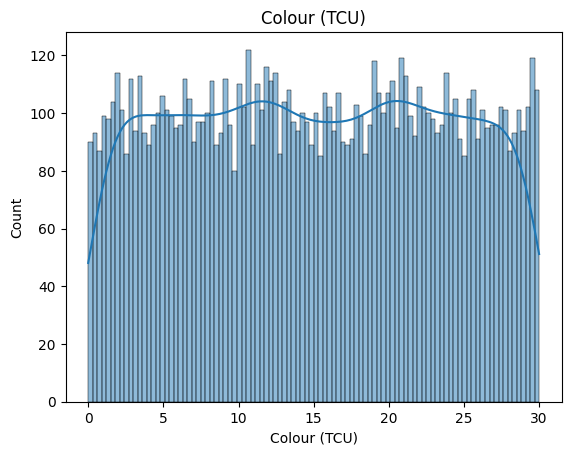

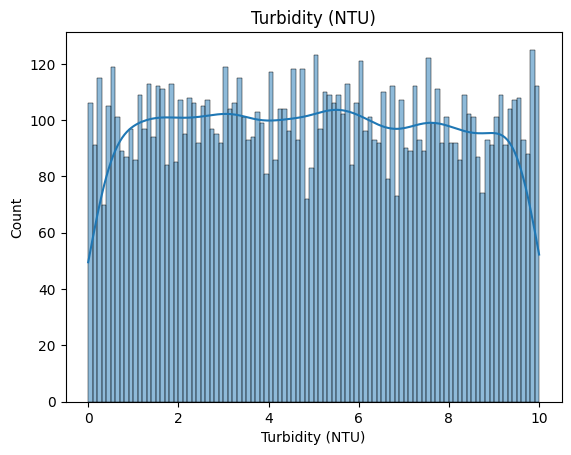

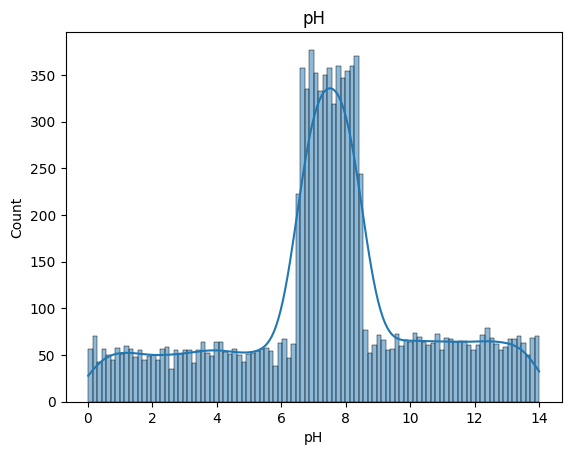

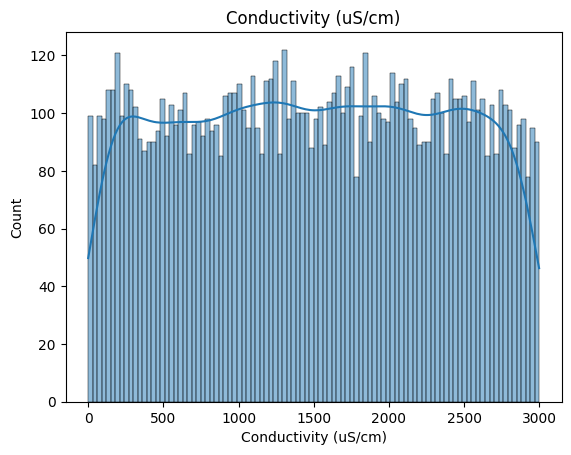

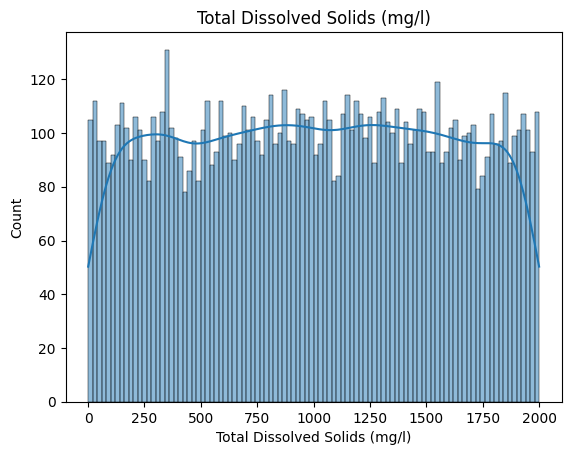

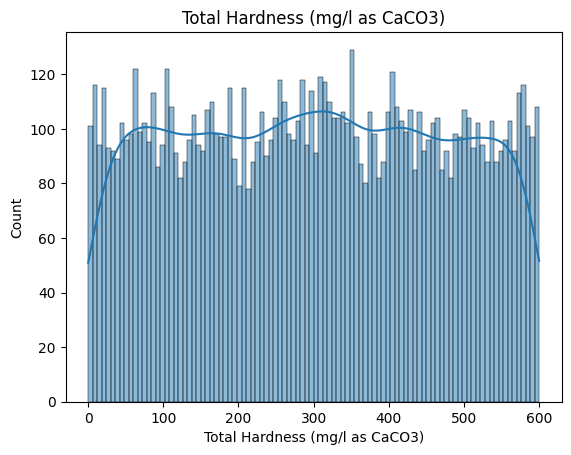

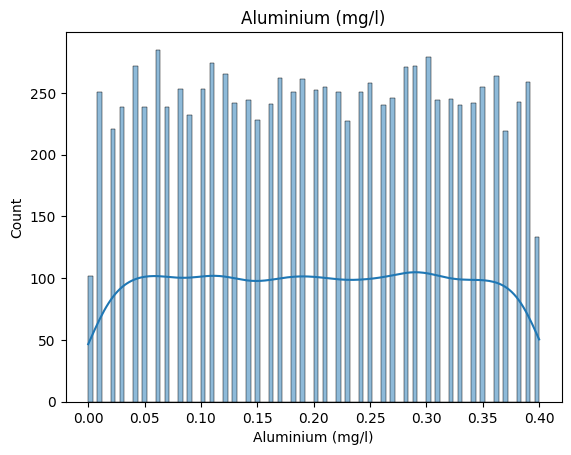

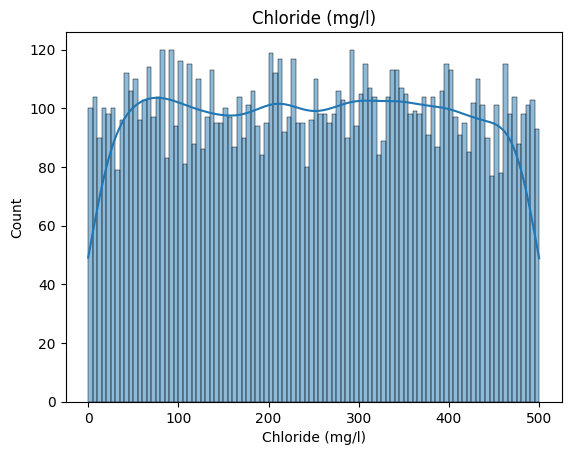

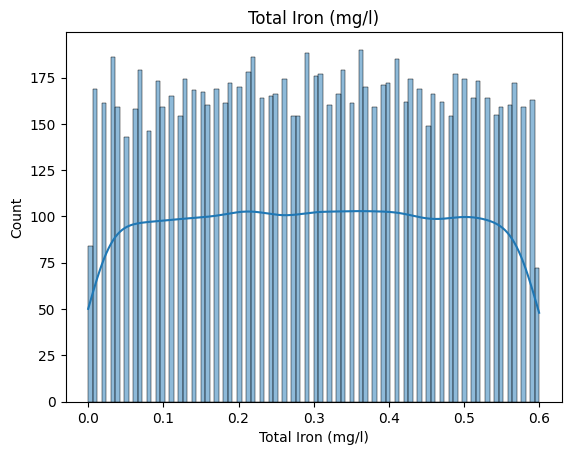

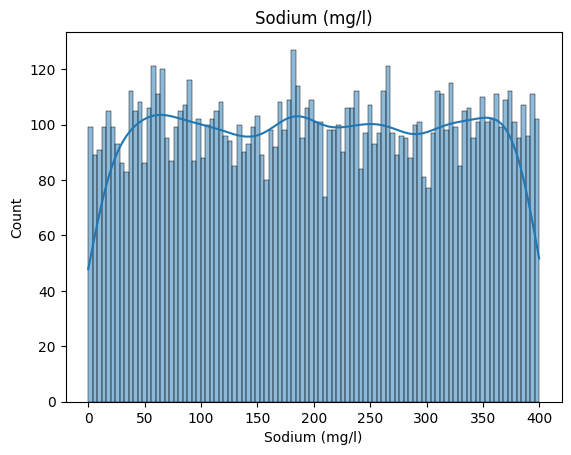

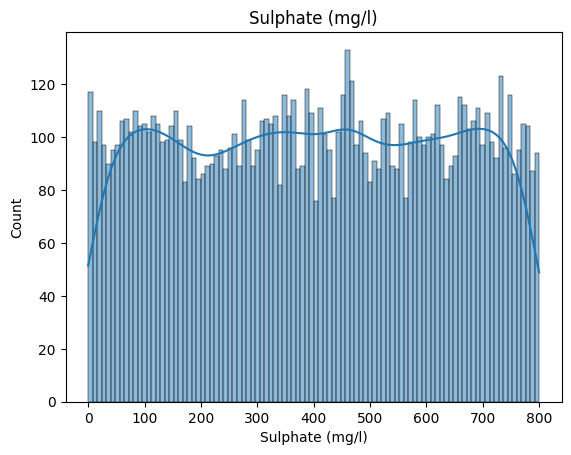

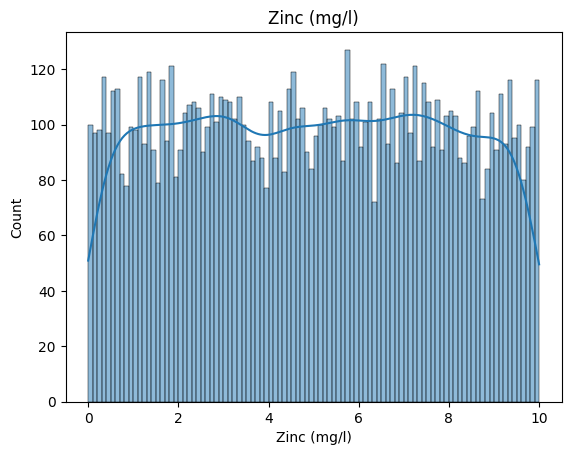

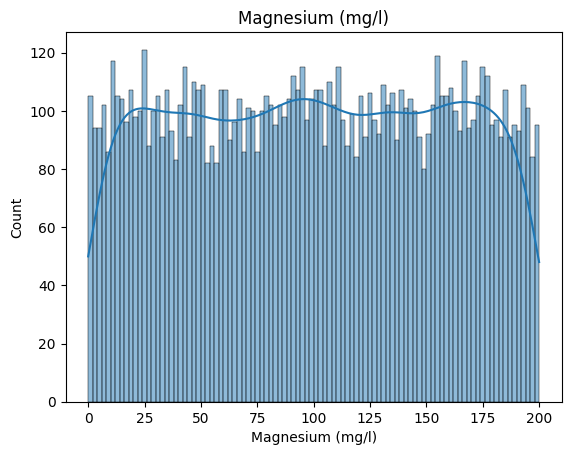

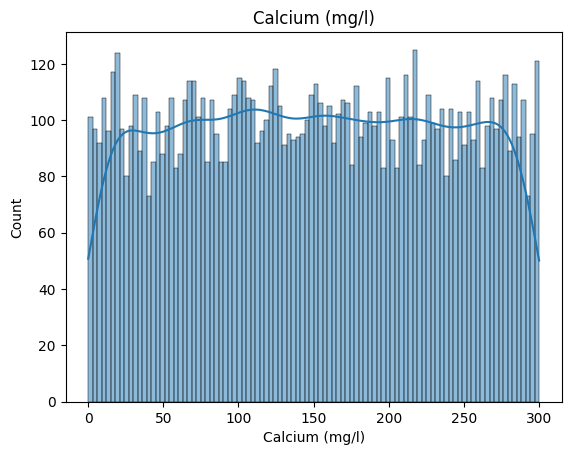

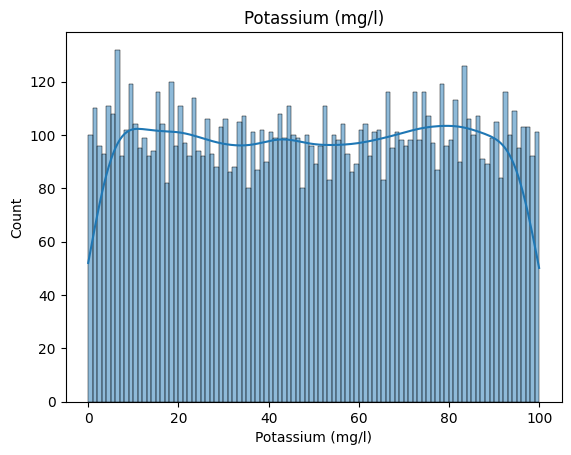

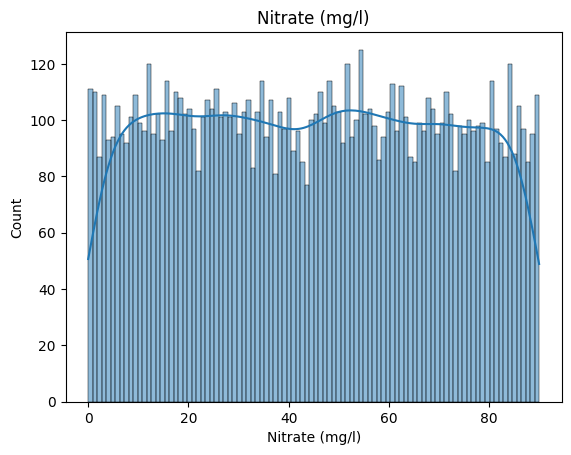

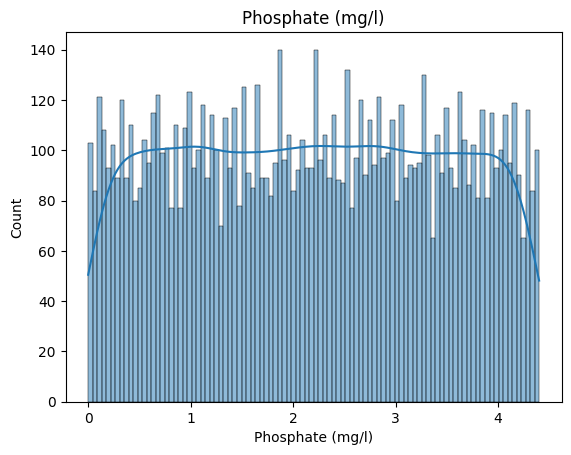

In [17]:
for i in df1.columns[:-1]:
    fig, ax = plt.subplots()
    sns.histplot(data=df1, x=i, kde=True,bins=100)
    ax.set_title(i)
    plt.show()

# Problems:

* ### In real world senario, not all parameters will satisfy the maximum limit to be considered as potable water. For eg, For any given water wuality measurement, if pH is within 6.5 to 8.5 but turbidity might be above 5 NTU or conductivity might be above 2000.

* ### Same can be said about Non potable water, for every record, not all parameters will fail to satisfy the acceptable values at the same time.

* ### Secondly, this dataset does not account for biological contaminants eg pathogens, algae,etc

* ### The data generated are random BUT uniformly generated.
